In [249]:
from torchdiffeq import truths
from torchdiffeq import models
from torchdiffeq import execs as ex
from torchdiffeq import vizualization as viz

import importlib

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import math

from matplotlib import pyplot as plt
importlib.reload(truths)
importlib.reload(models)
importlib.reload(ex)
importlib.reload(viz)

<module 'torchdiffeq.vizualization' from '/Users/trishul/Documents/Duke/s7/deep_learning/finalproj/torchdiffeq/vizualization.py'>

In [262]:
# GENERATE DATASET

dset = torch.from_numpy(truths.generate_truth_sampler_he1D(rod_size=12, num_init_states=100)).float()
print(dset.size())

import numpy as np
import matplotlib.pyplot as plt

def heat_equation_pde(L, n, T0, left_bound, right_bound, dx, alpha, t_final, dt):
  ans = []
  x = np.linspace(dx/2, L-dx/2, n)
  T = np.ones(n) * T0
  ans.append(T)
  dTdt = np.empty(n)
  t = np.arange(0, t_final, dt)
  for j in range(1, len(t)):
    plt.clf()
    for i in range(1,n-1):
      dTdt[i] = alpha*(-(T[i] - T[i-1])/dx**2  + (T[i+1]-T[i])/dx**2)
      dTdt[0] = alpha*(-(T[0] - left_bound)/dx**2  + (T[1]-T[0])/dx**2)
      dTdt[n-1] = alpha*(-(T[n-1] - T[n-2])/dx**2  + (right_bound-T[n-1])/dx**2)
    T = T + dTdt*dt
    ans.append(T)
  a = np.concatenate(
      [left_bound * np.ones((len(ans), 1)), np.array(ans), 
       right_bound * np.ones((len(ans), 1))], axis=1)
  ret = torch.from_numpy(a)
  # print(ret.size())
  # standing_temps = torch.zeros_like(ret)
  # standing_temps[:, 0] = left_bound
  # standing_temps[:, -1] = right_bound
  # ret = torch.from_numpy(np.stack([ret, standing_temps], axis=1))
  ret = ret.reshape(1, len(t), 1, len(x) + 2).type(torch.FloatTensor)
  return ret
torch_y_true = heat_equation_pde(L=0.1, n=10, T0=0, left_bound=40, right_bound=20, dx=0.01, alpha=0.0001, t_final=20, dt=0.1)
dp = torch.cat([torch_y_true, torch.tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])], 0)
dset = torch.cat([dp for i in range(100)], 0)

torch.Size([100, 1000, 2, 12])


RuntimeError: Expected object of scalar type Float but got scalar type Long for sequence element 1 in sequence argument at position #1 'tensors'

<Figure size 432x288 with 0 Axes>

In [264]:
print(dset[2, :100, 0])

tensor([[206.3712, 206.0334,   2.1057,  ..., 171.7080, 264.4209, 179.2723],
        [185.7003, 185.6744,  45.0786,  ..., 171.7080, 246.6348, 169.8599],
        [167.1277, 171.6174,  72.9884,  ..., 171.7080, 231.4646, 160.5514],
        ...,
        [ 25.4821,  50.0517,  72.9289,  ..., 171.7080, 114.4769,  57.2409],
        [ 25.3909,  49.8825,  72.7048,  ..., 171.7080, 114.4764,  57.2405],
        [ 25.3009,  49.7155,  72.4834,  ..., 171.7080, 114.4760,  57.2400]])


In [260]:

# model = models.DenseLayers1DimODE((2, 12))
model = models.ConvLayers1DimODE((2, 12))
optimizer = optim.Adam(model.parameters(), lr=0.0001)
t = torch.linspace(0, 1, 200)
train_loader = truths.TruthSampler(t, dset[:, :100], 10, 10).sample
losses = ex.train(model, train_loader, optimizer, test_freq=20, niters=1000)

RuntimeError: size mismatch, m1: [10 x 24], m2: [48 x 48] at ../aten/src/TH/generic/THTensorMath.cpp:752

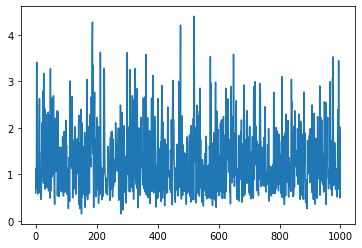

In [256]:
plt.plot(losses)

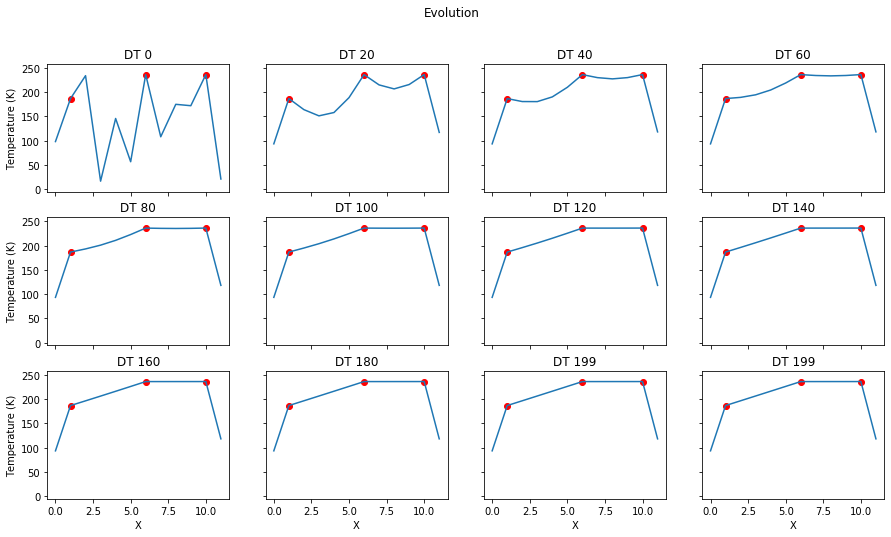

In [257]:
import seaborn as sns
from torchdiffeq import vizualization as viz
# viz.one_dim_heat_axis(dset[10][20])
viz.graph_oned_evolution(dset[14][:200], plot_count=10)
DATA_SET_SIZE = 200


In [238]:
y0 = dset[14][0:4] 
model_evolution = ex.get_model_evolution(model, y0)
print(model_evolution.size())

torch.Size([4, 5001, 2, 12])


/Users/trishul/Documents/Duke/s7/deep_learning/dlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.


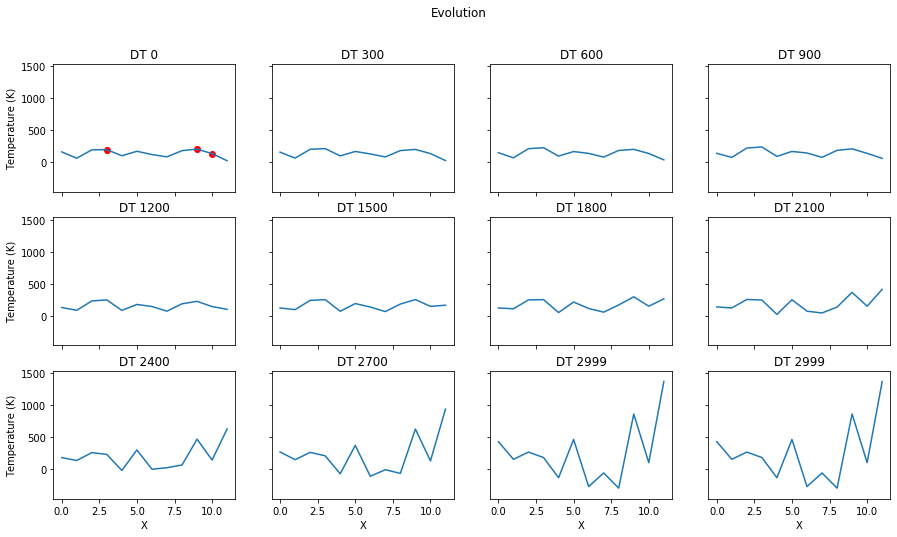

In [243]:
viz.graph_oned_evolution(model_evolution[1][:3000], plot_count=10).show()